# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### Imports and Constants

In [1]:
import numpy as np
import glob

import matplotlib.pyplot as plt

IMAGES_PATH = "./images"
WEIGHTS_PATH = "./coefs.npy"
BIAS_PATH = "./bias.npy"
INITIAL_SHAPE = None

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [38]:
def load_images(path: str) -> np.ndarray:
    global INITIAL_SHAPE
    
    filelist = sorted(glob.glob(f"{path}/*.png"))
    print(filelist)
    INITIAL_SHAPE = plt.imread(filelist[0]).shape

    return np.array([plt.imread(file).flatten() / 255.0 for file in filelist])

images = load_images(IMAGES_PATH)
print(images.shape)

['./images/01.png', './images/02.png', './images/03.png', './images/04.png', './images/05.png', './images/06.png', './images/07.png', './images/08.png']
(8, 12288)


### 2. Compute the mean of the images. 

In [39]:
images_mean = np.mean(images)
print(images_mean)

0.001730818


### 3. Normalize the images by subtracting the mean from each image.

In [40]:
images_norm = images - images_mean

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [42]:
W = np.load(WEIGHTS_PATH)
b = np.load(BIAS_PATH)

y_hat = images_norm @ W + b

def softmax(x: np.ndarray) -> np.ndarray:
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

activations = softmax(y_hat)
print(activations.shape)

predicted_labels = np.argmax(activations, axis=1)
print(predicted_labels)

(8, 4)
[0 0 1 1 2 2 0 2]


/var/folders/3v/r2bp9qg169g99367q11kxh2h0000gp/T/ipykernel_5412/2230317210.py:4: RuntimeWarning: divide by zero encountered in matmul
  y_hat = images_norm @ W + b
/var/folders/3v/r2bp9qg169g99367q11kxh2h0000gp/T/ipykernel_5412/2230317210.py:4: RuntimeWarning: overflow encountered in matmul
  y_hat = images_norm @ W + b
/var/folders/3v/r2bp9qg169g99367q11kxh2h0000gp/T/ipykernel_5412/2230317210.py:4: RuntimeWarning: invalid value encountered in matmul
  y_hat = images_norm @ W + b


### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [43]:
ground_truths = np.array([0, 0, 1, 1, 2, 2, 3, 3])

def accuracy_score(ground_truths: np.ndarray, predictions: np.ndarray) -> float:
    return np.sum(ground_truths == predictions) / ground_truths.shape[0]

score = accuracy_score(ground_truths, predicted_labels)
print(score)

0.75


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [22]:
labels = {
    0: "Cat",
    1: "Dog",
    2: "Frog",
    3: "Horse",
}

for index, pred in enumerate(predicted_labels):
    print(f"Label for prediction {index}: {labels[pred]}")

Label for prediction 0: Cat
Label for prediction 1: Dog
Label for prediction 2: Cat
Label for prediction 3: Frog
Label for prediction 4: Cat
Label for prediction 5: Frog
Label for prediction 6: Dog
Label for prediction 7: Frog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

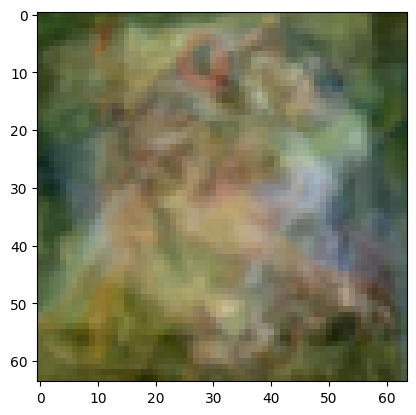

In [31]:
mean_image = np.mean(images, axis=0)

scaled_01_mean_image = (mean_image - np.min(mean_image)) / np.max(mean_image) - np.min(mean_image)
scaled_255_mean_image = (scaled_01_mean_image * 255).reshape(INITIAL_SHAPE).astype(np.uint8)

plt.imshow(scaled_255_mean_image)
plt.show()


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


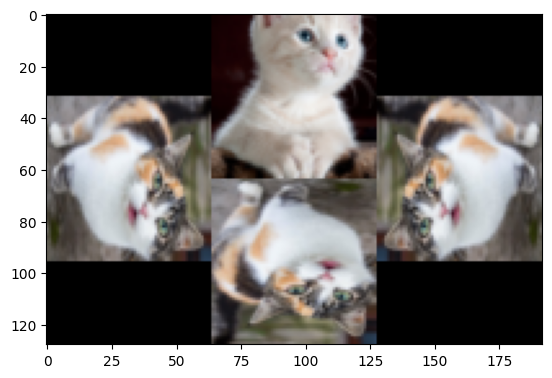

In [60]:
chosen_images = images[:4] * 255
chosen_images = np.reshape(chosen_images, (4, *INITIAL_SHAPE))

image_0 = chosen_images[0]
image_90 = np.rot90(chosen_images[1])
image_180 = np.rot90(image_90)
image_inv_90 = np.flip(image_90, axis=1)

print(image_0.shape)
print(image_90.shape)
print(image_180.shape)
print(image_inv_90.shape)

empty_array = np.zeros(shape=(64*2, 64*3, 3))
empty_array[32:96, 0:64, :] = image_inv_90
empty_array[0:64, 64:128, :] = image_0
empty_array[64:128, 64:128, :] = image_180
empty_array[32:96, 128:192, :] = image_90

plt.imshow(empty_array)
plt.show()
